# Khai báo thư viện

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

# Data

In [68]:
df = pd.read_csv("D:\_Dev\_Group Project\Affinity-Propagation-ML-UEH\Data\Mall Customers\Mall_Customers.csv")

In [69]:
print(f'{df.shape[0]} bản ghi')
print(f'{df.shape[1]} trường dữ liệu')

200 bản ghi
5 trường dữ liệu


In [70]:
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


| **Cột** | **Mô tả** |
|---|---|
| CustomerID| Định danh cho mỗi khách hàng |
| Genre | Giới tính |
| Age | Tuổi |
| Annual Income | Thu nhập hằng năm |
| Spending Score | Điểm chi tiêu |

In [71]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [72]:
df.head()

,customerid,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


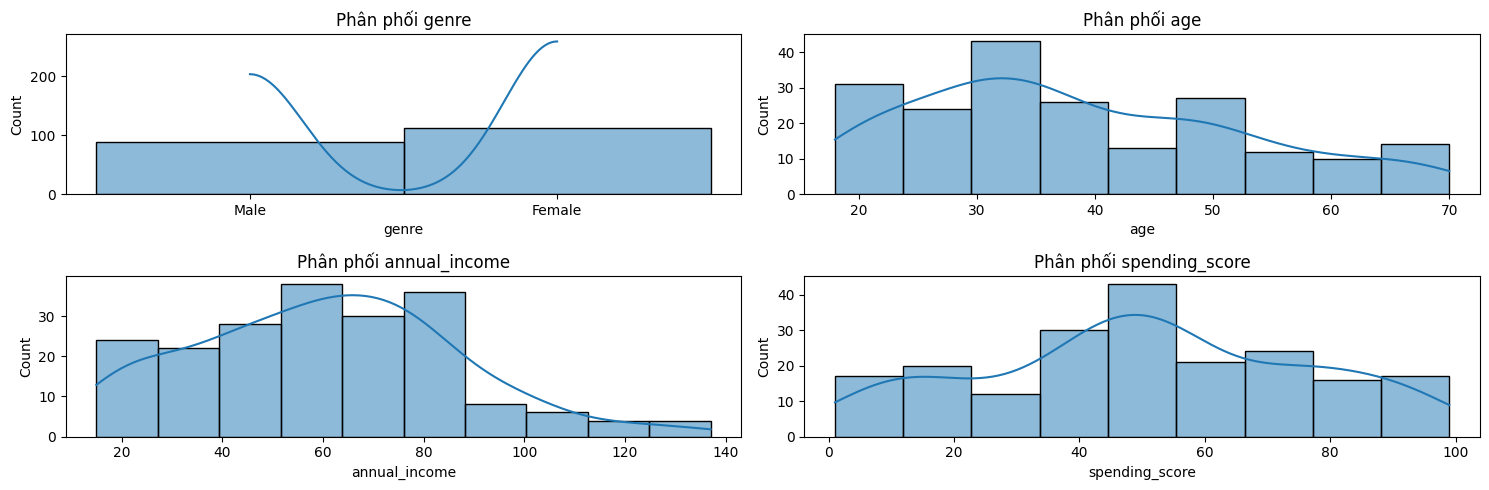

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
axes = axes.flatten() 

for i, col in enumerate(df.columns[1:]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Phân phối {col}')

plt.tight_layout()
plt.show()

# Tiền xử lý

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerid      200 non-null    int64 
 1   genre           200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [80]:
df.isnull().sum()

customerid        0
genre             0
age               0
annual_income     0
spending_score    0
dtype: int64

## Phát hiện ngoại lai

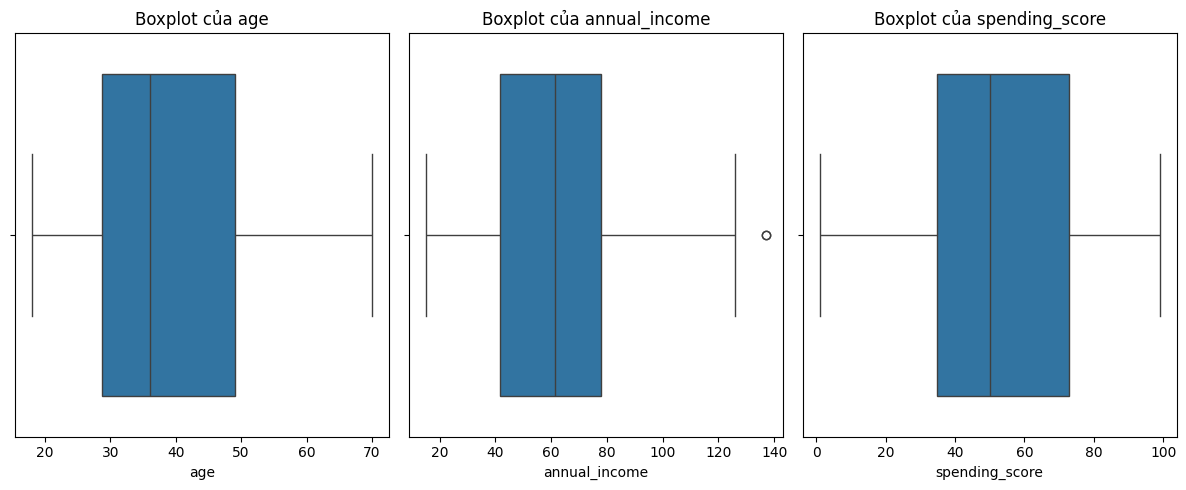

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(df.columns[2:]):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot của {col}')

plt.tight_layout()
plt.show()

In [89]:
Q3 = df['annual_income'].quantile(0.75)
Q1 = df['annual_income'].quantile(0.25)
upper_bound = Q3+1.5*(Q3-Q1)
df[df['annual_income']>upper_bound]
# Không drop

,customerid,genre,age,annual_income,spending_score
198,199,Male,32,137,18
199,200,Male,30,137,83


## Mã hoá

In [92]:
encoder = preprocessing.OneHotEncoder()
encoder_values = encoder.fit_transform(df[['genre']])
encoder_df = pd.DataFrame(encoder_values.toarray(), columns=encoder.get_feature_names_out())
df = pd.concat([df, encoder_df], axis=1)
df.drop(columns=['genre','genre_Male'],axis=1, inplace=True)

In [93]:
df.head()

,customerid,age,annual_income,spending_score,genre_Female
0,1,19,15,39,0.0
1,2,21,15,81,0.0
2,3,20,16,6,1.0
3,4,23,16,77,1.0
4,5,31,17,40,1.0


## Chuẩn hoá

In [98]:
cols = df.columns[1:-1].to_list()
scaler = preprocessing.StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [99]:
df.head()

,customerid,age,annual_income,spending_score,genre_Female
0,1,-1.424569,-1.738999,-0.434801,0.0
1,2,-1.281035,-1.738999,1.195704,0.0
2,3,-1.352802,-1.700830,-1.715913,1.0
3,4,-1.137502,-1.700830,1.040418,1.0
4,5,-0.563369,-1.662660,-0.395980,1.0


# Lưu

In [101]:
df.to_csv("D:\_Dev\_Group Project\Affinity-Propagation-ML-UEH\Data\Mall Customers\Mall_Customers_preprocessed.csv",index=False)